In [14]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv', sep =",")

In [3]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv', sep=",")

In [5]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


Какой клиент совершил больше всего успешных операций?

In [8]:
l1 = logs.groupby('client', as_index= False).sum().sort_values(by ='success', ascending= False)

In [9]:
l1[(l1.success==41)].client.sort_values().tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы осуществляется наибольшее количество успешных операций?

In [10]:
logs.groupby('platform').success.count()

platform
computer    1505
phone       2753
tablet       242
Name: success, dtype: int64

In [11]:
df= logs.merge(user_data)

In [12]:
df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


Какая платформа наиболее популярна среди премиумных клиентов?

In [13]:
df[df.premium == True].groupby('platform').success.count()

platform
computer    150
phone       246
tablet       24
Name: success, dtype: int64

In [15]:
not_prem = df.query('premium == False')

In [16]:
prem = df.query('premium == True')

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию. Какой график получится в результате?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

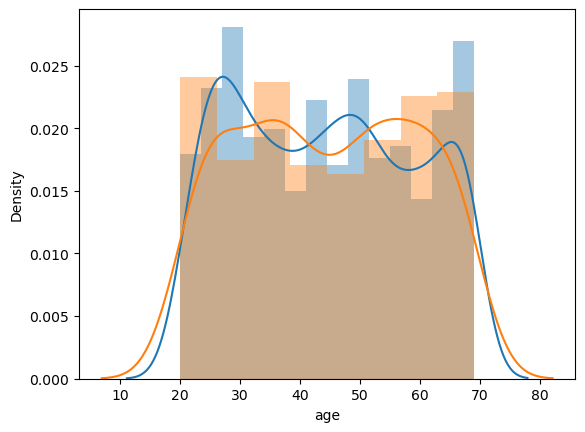

In [17]:
sns.distplot(not_prem.age)
sns.distplot(prem.age)

Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших столько успешных операций

In [27]:
gr_clients = df.query('success == True')\
.groupby('client')\
.agg({'success':'count'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='success', ylabel='count'>

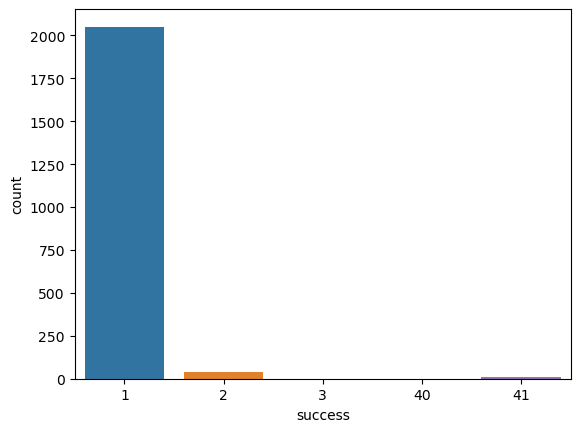

In [28]:
sns.countplot(gr_clients.success)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций.

In [30]:
computer_platform = df.query("success == True and platform == 'computer'").age

<AxesSubplot:xlabel='age', ylabel='count'>

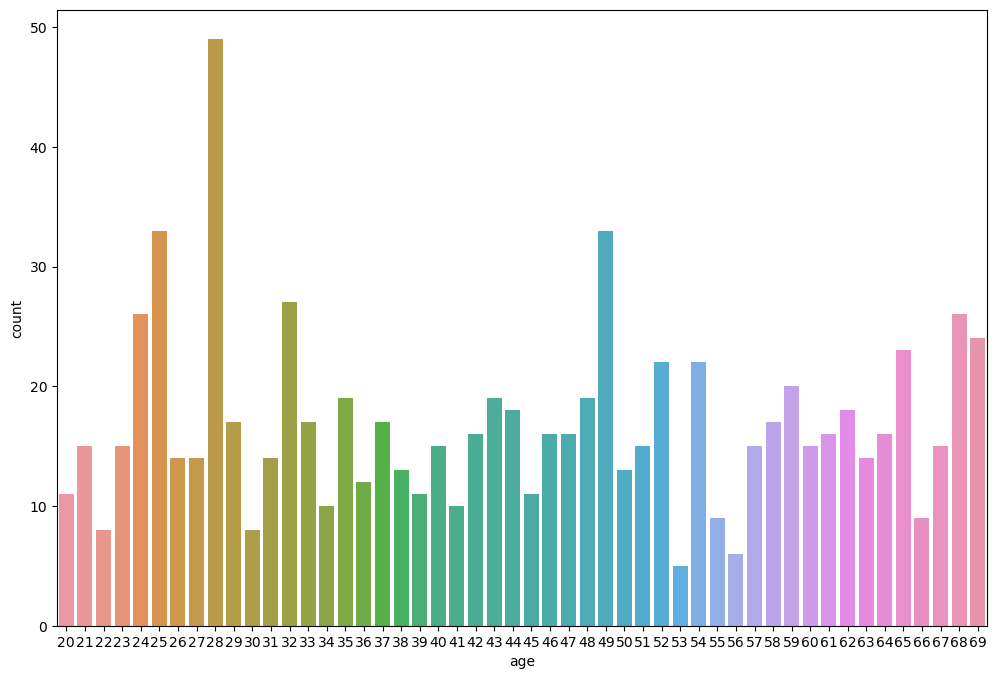

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(x = computer_platform)